In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *

In [3]:
# 17
PATH = Path('data/preprocessed/17')
path_x = PATH/'2017'
path_y = PATH/'labels'
path_stats = PATH/'stats.npy'
csv_path = PATH/'image_name_with_positive_labels.csv'

valid_pct = 0.1
num_workers = 6
sz = 512
bs = 32
classes = ','.join([str(o) for o in range(8)])

In [4]:
%run dataloader_single_input {str(path_x)} {str(path_y)} {str(csv_path)} \
                              {str(path_stats)} {classes} {bs} {sz} --num_workers={num_workers}\
                            --valid_pct={valid_pct}

Fire trace:
1. Initial component
2. ('The function received no value for the required argument:', 'sz')

Type:        function
String form: <function get_databunch at 0x7f2b083829d8>
File:        /data/ywx/landcover-diff/dataloader_single_input.py
Line:        5

Usage:       dataloader_single_input.py PATH PATH_X PATH_Y CSV_PATH PATH_STATS CLASSES BS SZ [NUM_WORKERS] [RET]
             dataloader_single_input.py --PATH PATH --path-x PATH_X --path-y PATH_Y --csv-path CSV_PATH --path-stats PATH_STATS --classes CLASSES --bs BS --sz SZ [--num-workers NUM_WORKERS] [--ret RET]


FireExit: 2

In [7]:
it = iter(databunch.train_dl)

In [8]:
x, y = next(it)
nx, ny = to_np(x), to_np(y)

## num_workers benchmark

In [11]:
%%time
print(num_workers)
for x, y in iter(databunch.train_dl):
    pass

6
CPU times: user 4.26 s, sys: 2.85 s, total: 7.11 s
Wall time: 23.1 s


In [12]:
%%time
databunch.num_workers = 8
for x, y in iter(databunch.train_dl):
    pass

6
CPU times: user 3.03 s, sys: 2.53 s, total: 5.55 s
Wall time: 23.8 s


In [13]:
%%time
databunch.num_workers = 16
for x, y in iter(databunch.train_dl):
    pass

CPU times: user 3.8 s, sys: 2.61 s, total: 6.42 s
Wall time: 22.8 s


# get learner

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *

In [3]:
# 17
PATH = Path('data/preprocessed/17')
path_x = PATH/'2017'
path_y = PATH/'labels'
path_stats = PATH/'stats.npy'
csv_path = PATH/'image_name_with_positive_labels.csv'

valid_pct = 0.1
sz = 512
bs = 34
# bs = 10
classes = ','.join([str(o) for o in range(8)])

In [4]:
gpu_start = 4
world_size = 2
arch = 'DLinkNet34'
load_name = ''

In [6]:
%run train_segmentation_new {str(PATH)} {str(path_x)} {str(path_y)} {str(csv_path)} \
                            {str(path_stats)} {classes} {bs} {sz} {gpu_start} \
                            --world_size={world_size} --arch={arch} \
                            --load_name={load_name} --valid_pct={valid_pct}

In [6]:
learner.freeze_to(1)
# learner.fit_one_cycle(1, 0.1)

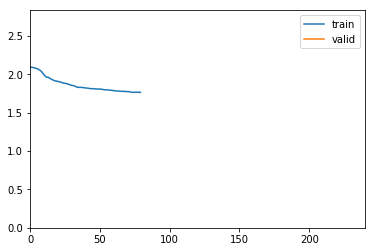

In [ ]:
# learner.unfreeze()
lr = 1e-2
callbacks = [SaveModelCallback(learner, name='first_run'),
            ShowGraph(learner)]
learner.fit_one_cycle(3, lr, callbacks=callbacks)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


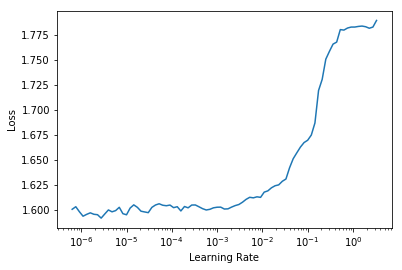

In [8]:
learner.lr_find()
learner.recorder.plot()

In [10]:
split_model??

Signature: split_model(model: torch.nn.modules.module.Module, splits: Collection[Union[torch.nn.modules.module.Module, Collection[torch.nn.modules.module.Module]]], want_idxs: bool = False)
Source:   
def split_model(model:nn.Module, splits:Collection[Union[nn.Module,ModuleList]], want_idxs:bool=False):
    "Split `model` according to the layers in `splits`."
    layers = flatten_model(model)
    splits = listify(splits)
    if isinstance(splits[0], nn.Module):
        idxs = [layers.index(first_layer(s)) for s in splits]
        res = split_model_idx(model, idxs)
    else: res = [nn.Sequential(*s) for s in splits]
    return (res,idxs) if want_idxs else res
File:      ~/miniconda3/envs/pytorch1/lib/python3.7/site-packages/fastai/torch_core.py
Type:      function


Total time: 02:29
epoch  train_loss  valid_loss
1      1.606061    1.508762    (01:15)
2      1.584250    1.440444    (01:14)



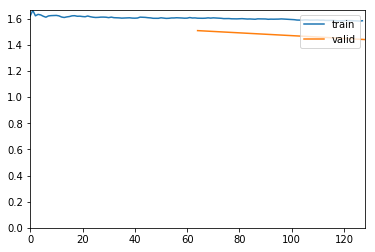

In [10]:
learner.unfreeze()
lr = 1e-3
callbacks = [SaveModelCallback(learner, name='first_run'),
            ShowGraph(learner)]
learner.fit_one_cycle(2, lr, callbacks=callbacks)

In [7]:
lr = 1e-3 / 2
callbacks = [SaveModelCallback(learner, name='first_run')]
learner.fit_one_cycle(2, lr)

Total time: 02:34
epoch  train_loss  valid_loss
1      1.839756    1.871357    (01:24)
2      1.726232    1.643135    (01:09)



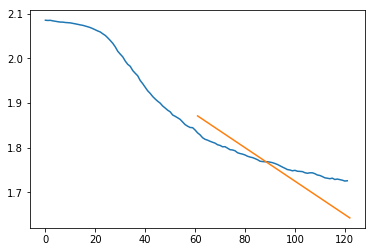

In [8]:
learner.recorder.plot_losses()

Total time: 02:41
epoch  train_loss  valid_loss
1      1.630493    1.569906    (01:27)
2      1.605648    1.520272    (01:12)



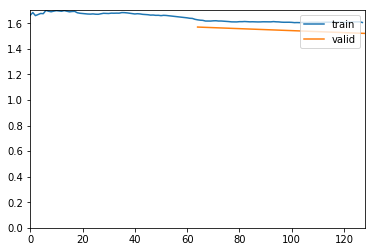

In [7]:
lr = 1e-3 / 2
callbacks = [SaveModelCallback(learner, name='first_run'),
            ShowGraph(learner)]
learner.fit_one_cycle(2, lr, callbacks=callbacks)

Total time: 02:32
epoch  train_loss  valid_loss
1      1.589718    1.563079    (01:16)
2      1.583369    1.462076    (01:15)



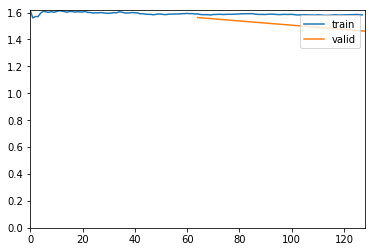

In [9]:
learner.unfreeze()
lr = 1e-3 / 2
callbacks = [SaveModelCallback(learner, name='first_run'),
            ShowGraph(learner)]
learner.fit_one_cycle(2, lr, callbacks=callbacks)

In [31]:
learner.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


Total time: 02:32
epoch  train_loss  valid_loss
1      1.589718    1.563079    (01:16)
2      1.583369    1.462076    (01:15)



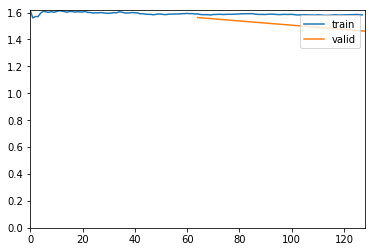

In [9]:
learner.unfreeze()
lr = 1e-3 / 2
callbacks = [SaveModelCallback(learner, name='first_run'),
            ShowGraph(learner)]
learner.fit_one_cycle(2, lr, callbacks=callbacks)

## write a loss function

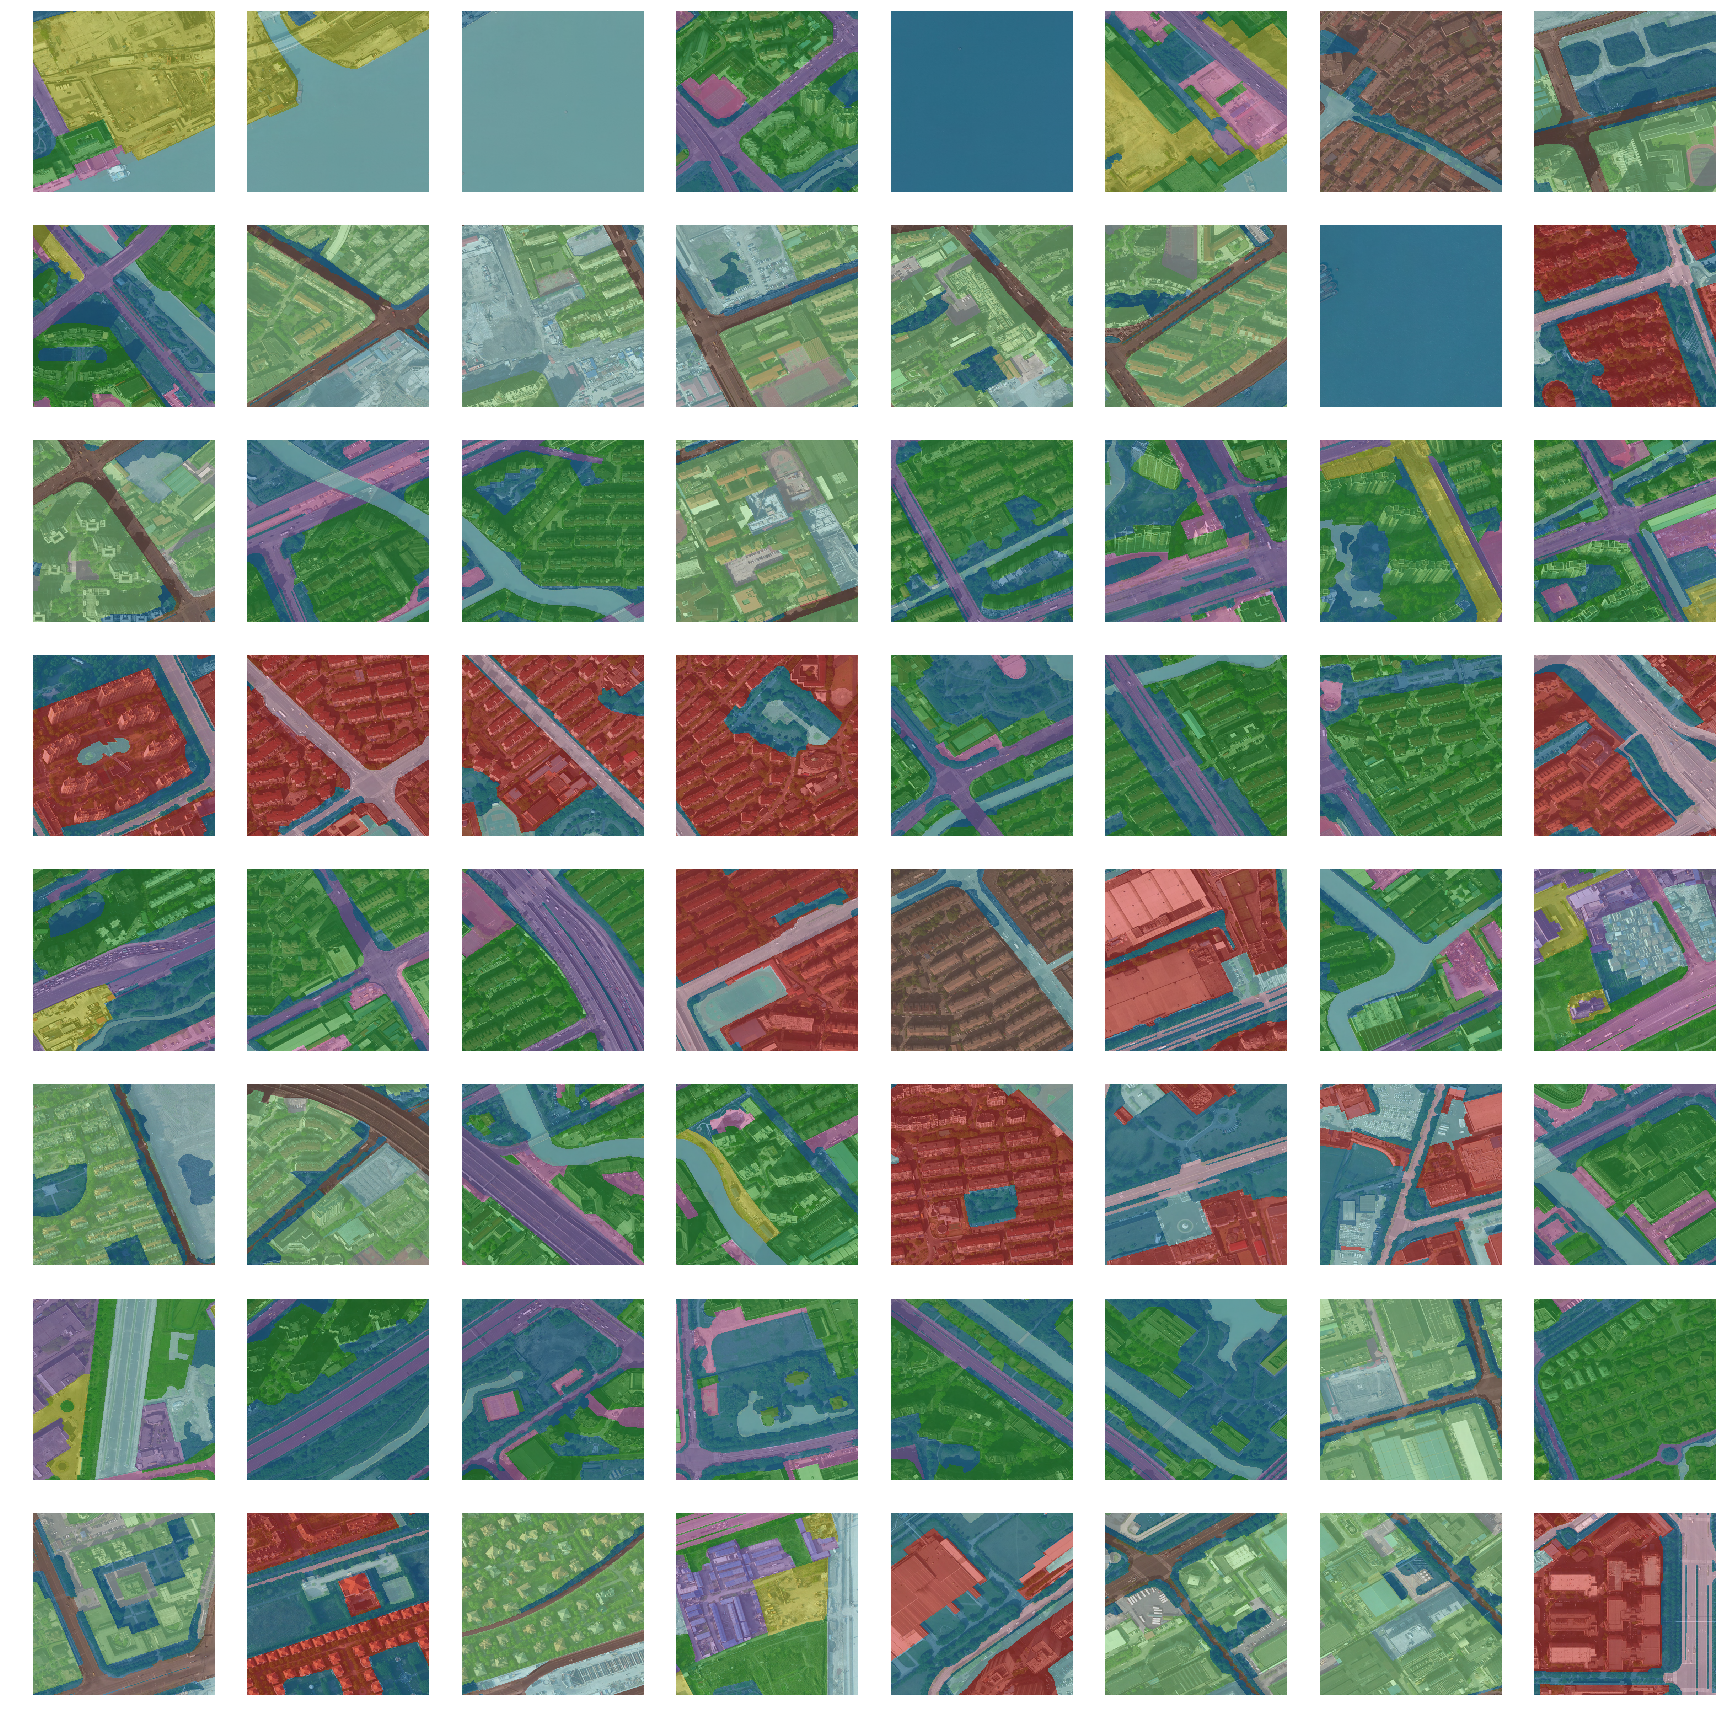

In [28]:
learner.data.show_batch(figsize=(24,24), is_train=False)

In [30]:
learner.validate(learner.data.valid_dl, metrics=[accuracy])

[1.4246886, 0.4659953471398194]

In [29]:
learner.loss_func

CrossEntropyFlat()

In [20]:
x.max(), y.max()

(tensor(4.8791, device='cuda:4'), tensor(7, device='cuda:4'))

In [23]:
xd = learner.data.denorm(x.cpu())

In [21]:
x.min()

tensor(-2.2888, device='cuda:4')

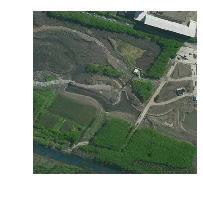

In [24]:
Image.show(xd[0])